In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. [Load and Check Data](#1)
1. [Variable Description](#2)
1. [Basic Data Analysis](#3)
1. [Data cleaning](#4)
1. [Data Visualization](#5)
    1. [Politician](#6)
    1. [Serieal killer](#7)

<a id="1" ></a><br>
# Load and Check Data

In [2]:
Data=pd.read_csv('../input/age-dataset/AgeDataset-V1.csv')


In [3]:
Data.corr()

,Birth year,Death year,Age of death
Birth year,1.000000,0.994152,0.172205
Death year,0.994152,1.000000,0.277575
Age of death,0.172205,0.277575,1.000000


In [4]:
Data.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [5]:
Data.columns

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')

In [6]:
Data['Gender'].unique()


array(['Male', 'Female', nan, 'Transgender Female', 'Intersex',
       'Transgender Person; Intersex; Transgender Male', 'Non-Binary',
       'Eunuch; Male', 'Transgender Male', 'Eunuch', 'Intersex; Male',
       'Transgender Female; Female', 'Transgender Female; Male',
       'Female; Male', 'Intersex; Transgender Male',
       'Transgender Male; Female', 'Transgender Male; Male',
       'Intersex; Female', 'Transgender Female; Intersex',
       'Female; Female', 'Non-Binary; Intersex'], dtype=object)

In [7]:
Data['Occupation'].unique().tolist()

['Politician',
 'Artist',
 'Egyptologist',
 'Astronomer',
 'Ruler',
 'Statesperson',
 'Regent',
 'Athlete',
 'Researcher',
 'Official; french resistance fighter',
 'Sovereign',
 'Playwright',
 'Military personnel',
 'Philosopher',
 'Businessperson',
 'Game designer; role-playing game designer',
 'Explorer',
 'Architect',
 'Teacher',
 'Activist',
 'Aristocrat',
 'Racing automobile driver',
 'Entrepreneur',
 'Motorcycle racer; formula one driver',
 'Formula one driver',
 'Journalist',
 'Geographer; explorer',
 'Monarch',
 'Business executive',
 'Racing automobile driver; formula one driver',
 'Engineer',
 'Farmer; formula one driver',
 'Author',
 'Hammer thrower',
 nan,
 'Religious figure',
 'Resistance fighter',
 'Sailor',
 'Monk; ascetic',
 'Condottiero',
 'Puppeteer',
 'Privateer; pirate',
 'Navigator; explorer',
 'Sailor; explorer',
 'Cartographer; naval officer; explorer; seafarer',
 'Conquistador; governor; explorer',
 'Homekeeper',
 'Student',
 'Official',
 'Nutritionist',
 'Molec

<a id="2" ></a><br>
# Variable Description

1. Id: unique id number of the each person
1. Name: name of person
1. Short Description:personel information
1. Gender: gender of the person
1. country: country of the person
1. Occupation: job of the person
1. Birth year: year of birth
1. Death year: year of death
1. Manner of death: cause of death
1. Age of death: age at death

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


* float64(2): Age of death, Death year
* int64(1): Birth year
* object(7): Id, Name, Short description, Gender , Country, Occupation, Manner of death

<a id="3" ></a><br>
# Basic Data Analysis

In [9]:
Data.isnull().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
dtype: int64

In [10]:

Data['Age of death']=Data['Age of death'].fillna(0)
Data['Death year']=Data['Death year'].fillna(0)

In [11]:
Data['Age of death'].isnull().sum()
Data['Death year'].isnull().sum()

0

In [12]:
Data.isnull().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 0
Manner of death      1169406
Age of death               0
dtype: int64

In [13]:
Data[['Gender','Age of death']]

,Gender,Age of death
0,Male,67.0
1,Male,49.0
2,Male,56.0
3,Male,35.0
4,Male,57.0
...,...,...
1223004,NaN,89.0
1223005,NaN,56.0
1223006,NaN,24.0
1223007,Male,28.0


In [14]:
Data[["Gender",'Age of death']].groupby(['Gender'],as_index=False).mean().sort_values(by='Age of death',ascending=True)

,Gender,Age of death
11,Non-Binary; Intersex,22.000000
15,Transgender Female; Male,37.000000
12,Transgender Female,49.810127
0,Eunuch,51.333333
7,Intersex; Male,55.500000
16,Transgender Male,57.111111
5,Intersex,59.000000
14,Transgender Female; Intersex,61.000000
10,Non-Binary,61.000000
17,Transgender Male; Female,62.000000


<a id="4" ></a><br>
# Data cleaning

In [15]:
Data.isnull().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 0
Manner of death      1169406
Age of death               0
dtype: int64

In [16]:
Data['Short description']=Data['Short description'].fillna('null')
Data['Gender']=Data['Gender'].fillna('null')
Data['Country']=Data['Country'].fillna('null')
Data['Occupation']=Data['Occupation'].fillna('null')
Data['Manner of death']=Data['Manner of death'].fillna('null')

In [17]:
Data.isnull().sum()

Id                   0
Name                 0
Short description    0
Gender               0
Country              0
Occupation           0
Birth year           0
Death year           0
Manner of death      0
Age of death         0
dtype: int64

In [18]:
Data['Gender'].unique()

array(['Male', 'Female', 'null', 'Transgender Female', 'Intersex',
       'Transgender Person; Intersex; Transgender Male', 'Non-Binary',
       'Eunuch; Male', 'Transgender Male', 'Eunuch', 'Intersex; Male',
       'Transgender Female; Female', 'Transgender Female; Male',
       'Female; Male', 'Intersex; Transgender Male',
       'Transgender Male; Female', 'Transgender Male; Male',
       'Intersex; Female', 'Transgender Female; Intersex',
       'Female; Female', 'Non-Binary; Intersex'], dtype=object)

In [19]:
#  remove the null
Data=Data[Data['Gender']!='null']
Data=Data[Data['Manner of death']!='null']


<a id="5" ></a><br>
# Data Visualization

<AxesSubplot:>

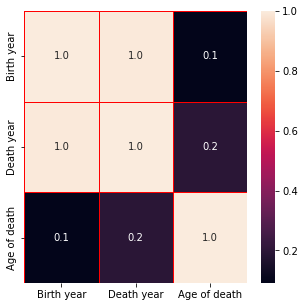

In [20]:
#correlation map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(Data.corr(),annot=True,linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)

In [21]:

Data['Gender'].value_counts()


Male                          43691
Female                         8365
Transgender Female               26
Transgender Male                 13
Eunuch; Male                      6
Intersex                          2
Transgender Female; Female        1
Eunuch                            1
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


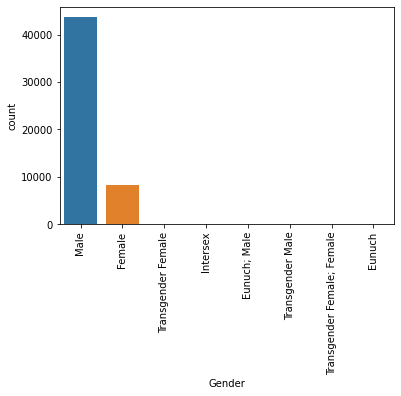

In [22]:
#count plot
sns.countplot(Data['Gender'])

plt.xticks(rotation=90)

plt.show()

In [23]:
Data['Gender'].unique().size

8

Text(0.5, 1.0, 'Number of people by gender')

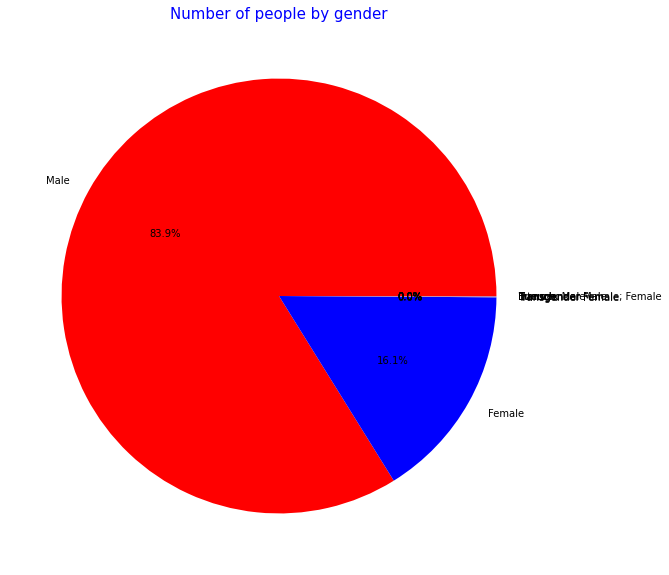

In [24]:
#pie plot 
label=Data['Gender'].value_counts().index
colors=['red','blue','silver']
explode = [0,0,0,0,0,0,0,0]
sizes=Data['Gender'].value_counts().values

#visual
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct='%1.1f%%')
plt.title('Number of people by gender',color = 'blue',fontsize = 15)


In [25]:
Data['Manner of death'].value_counts()

natural causes                            33532
suicide                                    5318
accident                                   4803
homicide                                   4358
capital punishment                         3017
                                          ...  
unnatural death; execution by shooting        1
rape                                          1
chronic obstructive pulmonary disease         1
suicide; substance abuse                      1
White Terror                                  1
Name: Manner of death, Length: 198, dtype: int64

In [26]:
Data['Manner of death'].unique().size

198

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


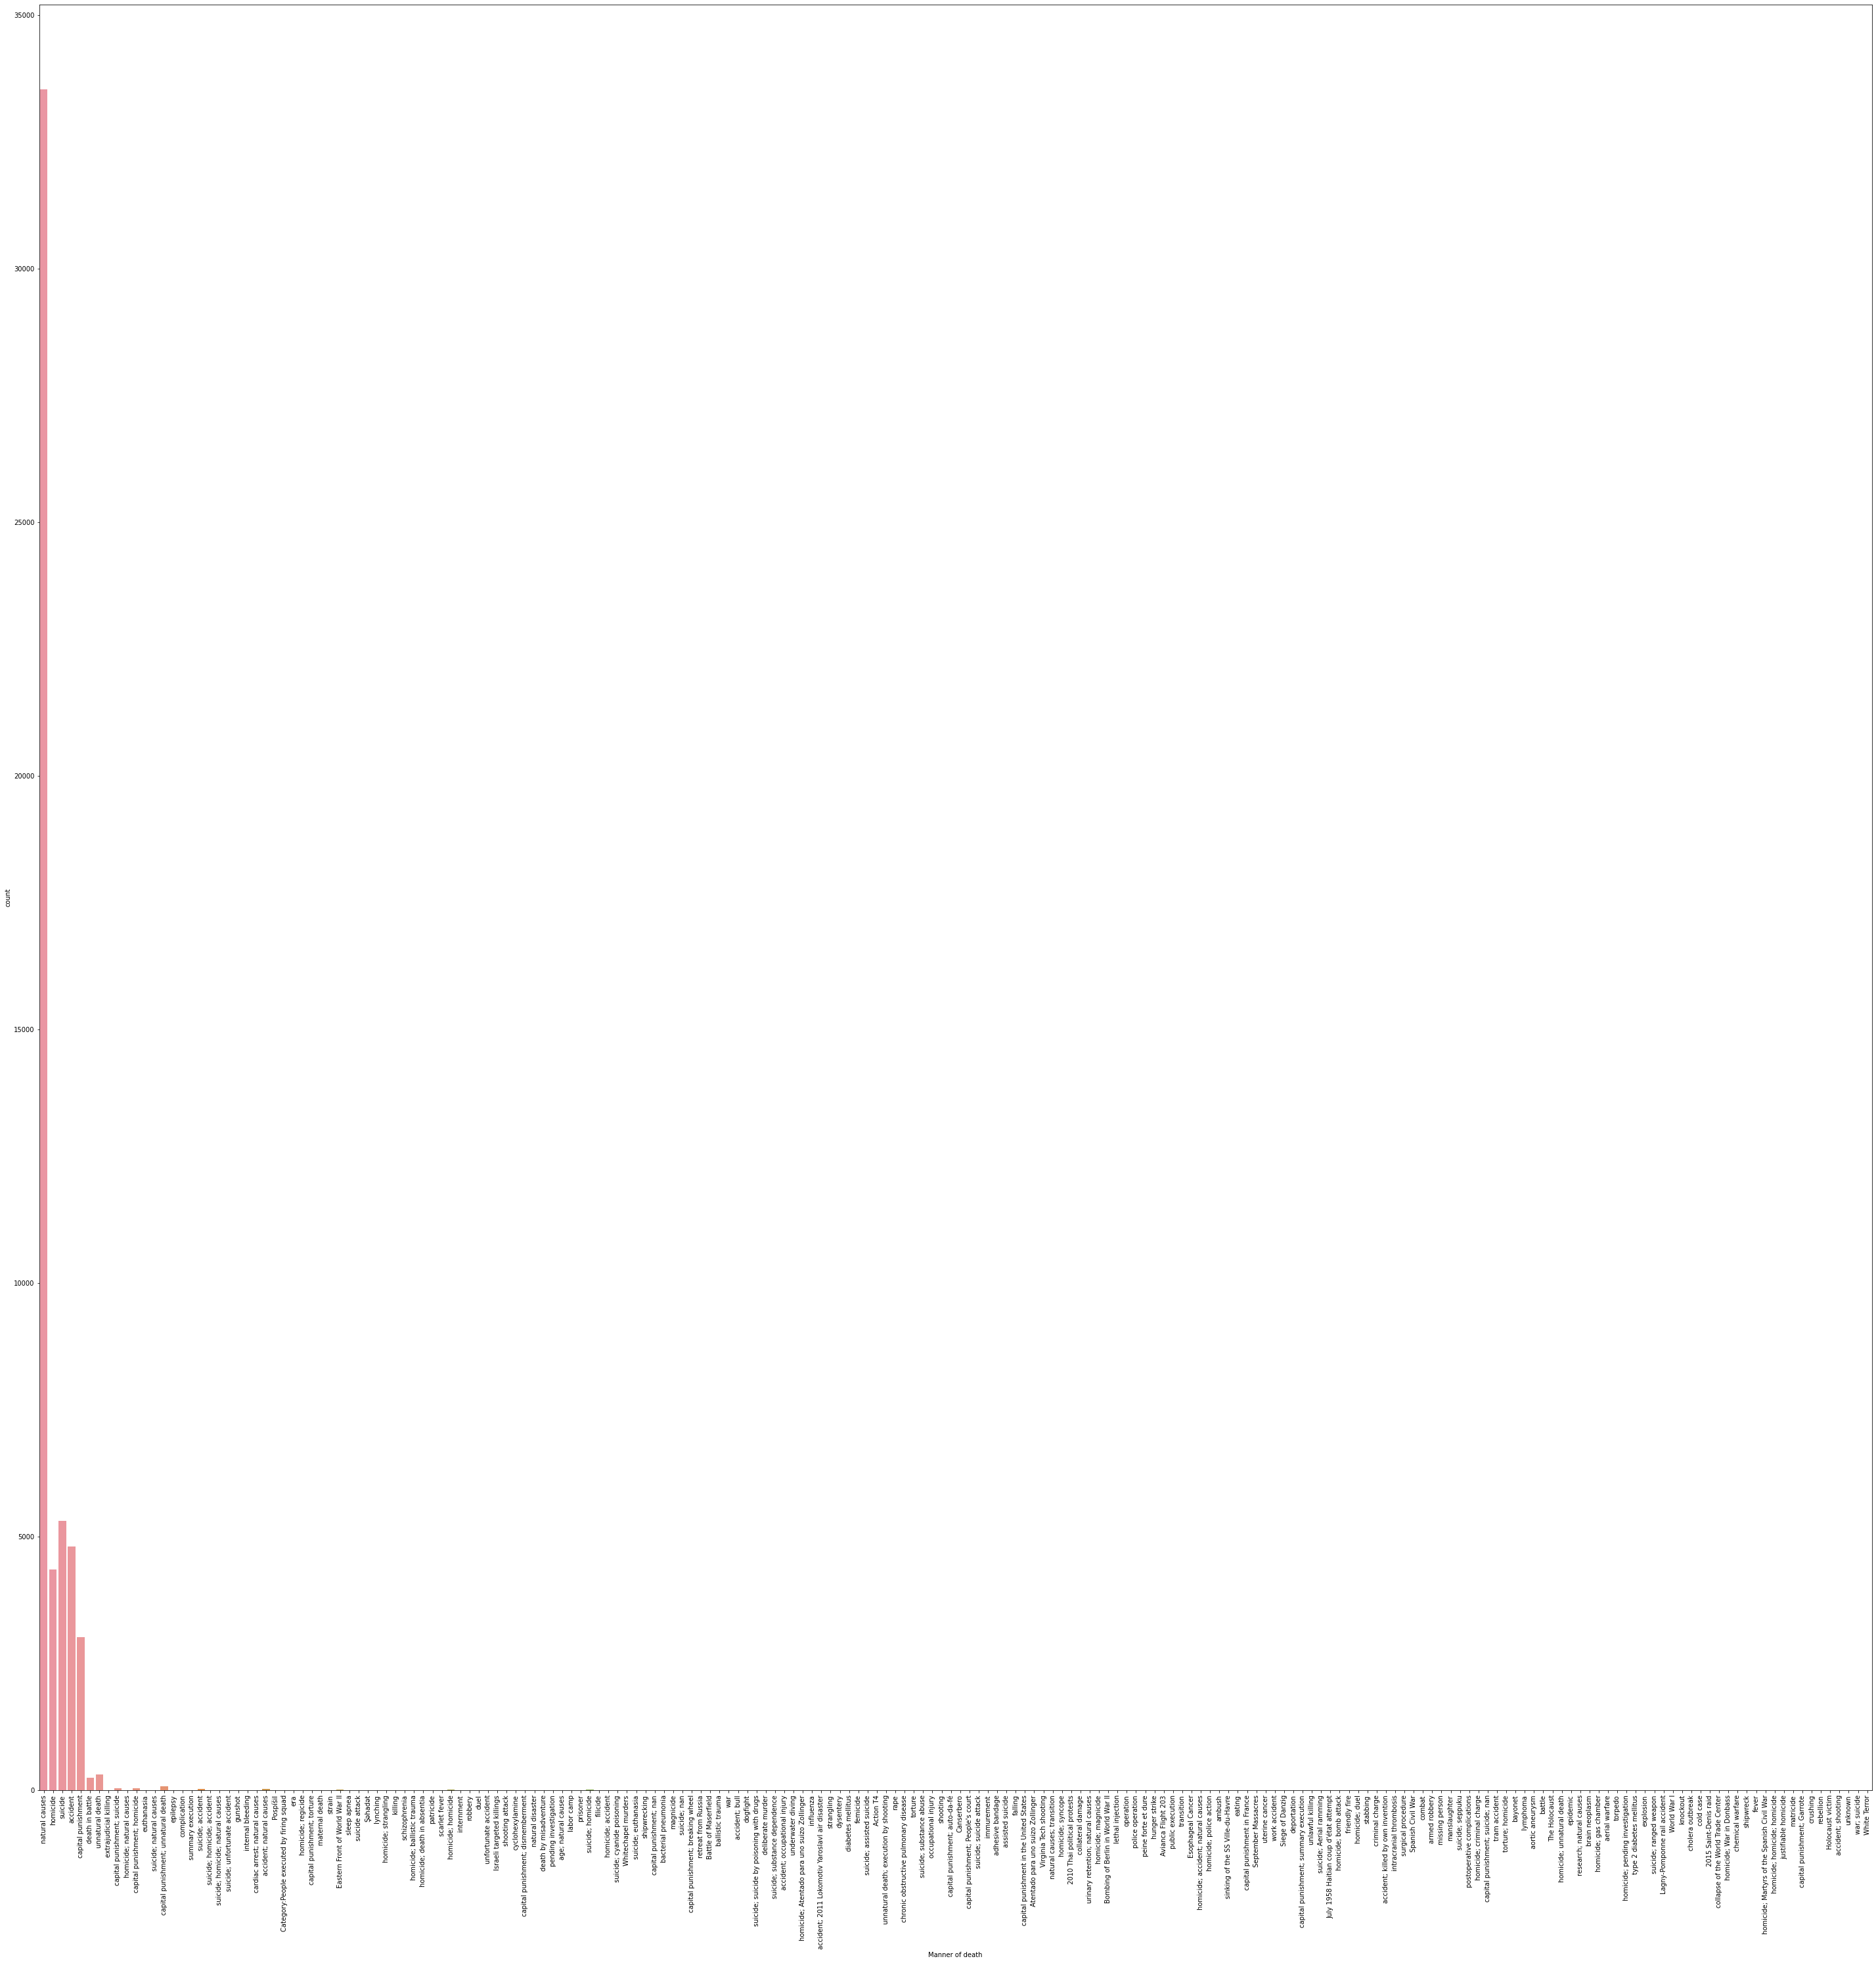

In [27]:
#count plot
plt.figure(figsize=(50,50))
sns.countplot(Data['Manner of death'])

plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Manner of death')

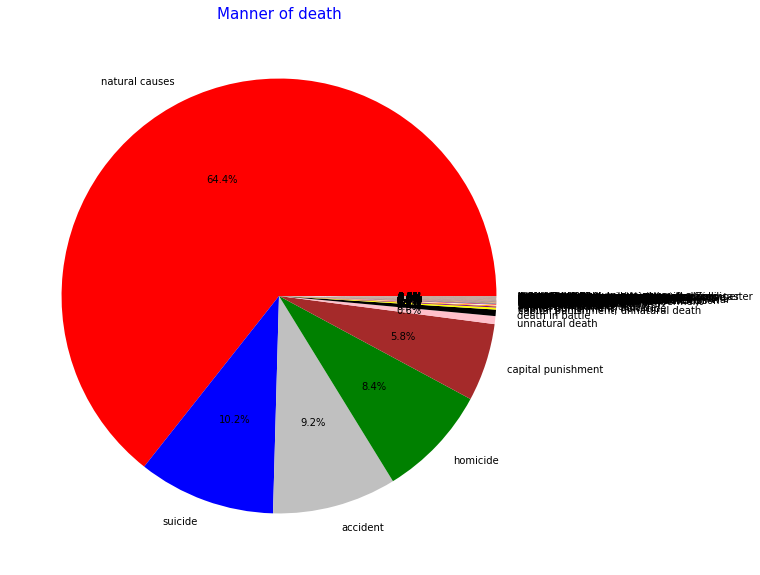

In [28]:
#pie plot 
label=Data['Manner of death'].value_counts().index
colors=['red','blue','silver','green','brown','pink','black','yellow','purple','orange','white']
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes=Data['Manner of death'].value_counts().values

#visual
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct='%1.1f%%')
plt.title('Manner of death',color = 'blue',fontsize = 15)

<a id="6" ></a><br>

## Politician 

In [29]:
politicians=Data[Data['Occupation']=='Politician']
politicians

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
17,Q368,Augusto Pinochet,"General, politician of Chile (1915-2006)",Male,Chile,Politician,1915,2006.0,natural causes,91.0
23,Q440,Salvador Allende,28th president of Chile (1908–1973),Male,Chile,Politician,1908,1973.0,suicide,65.0
27,Q475,Eduardo Frei Montalva,President of Chile (1911-1982),Male,Chile,Politician,1911,1982.0,homicide,71.0
...,...,...,...,...,...,...,...,...,...,...
1203269,Q65044674,Patrick Anthony Mwewa Chikusu,Zambian politician,Male,Zambia,Politician,1951,2013.0,natural causes,62.0
1206347,Q66117665,Paul John Hilbert,American politician,Male,null,Politician,1949,2001.0,natural causes,52.0
1207380,Q66629129,Akhilesh Singh,Indian politician,Male,India,Politician,1959,2019.0,natural causes,60.0
1210994,Q69417231,Enrique Riaza,Spaans dierenarts (1890-1940),Male,Spain,Politician,1890,1940.0,White Terror,50.0


In [30]:
politicians[["Gender",'Age of death']].groupby(['Gender'],as_index=False).mean().sort_values(by='Age of death',ascending=True)

,Gender,Age of death
3,Transgender Female,45.000000
1,Female,59.462334
4,Transgender Male,60.000000
2,Male,60.262516
0,Eunuch; Male,72.500000


In [31]:
politicians[["Manner of death",'Age of death']].groupby(['Manner of death'],as_index=False).mean().sort_values(by='Age of death',ascending=True)

,Manner of death,Age of death
38,public execution,20.000000
31,homicide; police action,27.000000
30,homicide; magnicide,29.000000
3,Siege of Danzig,35.000000
27,homicide; death in absentia,35.000000
28,homicide; duel,37.000000
37,pending investigation,40.000000
43,torture,41.000000
13,capital punishment; suicide,41.250000
17,duel,41.500000


In [32]:
politicians['Gender'].unique().size

5

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


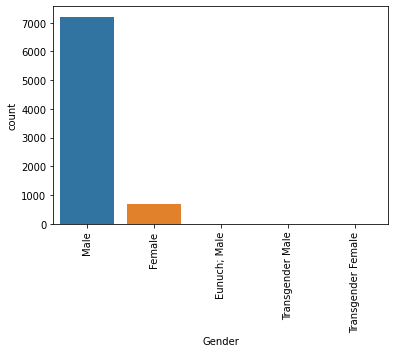

In [33]:
sns.countplot(politicians['Gender'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Number of politicians by gender')

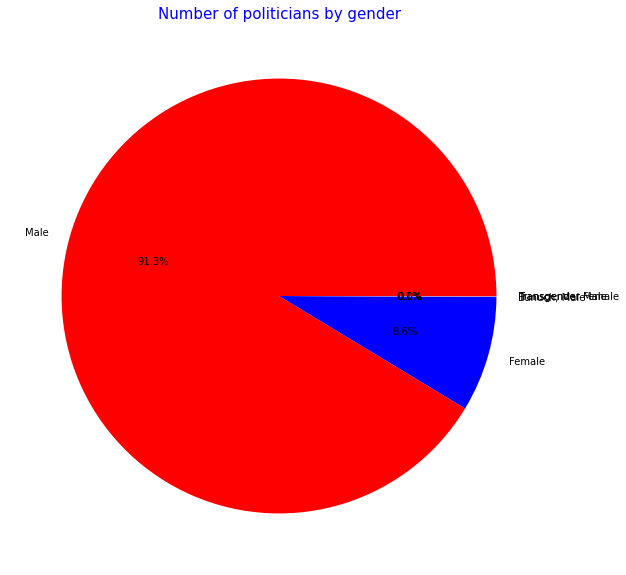

In [34]:
#pie plot 
label=politicians['Gender'].value_counts().index
colors=['red','blue','silver']
explode = [0,0,0,0,0]
sizes=politicians['Gender'].value_counts().values

#visual
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct='%1.1f%%')
plt.title('Number of politicians by gender',color = 'blue',fontsize = 15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


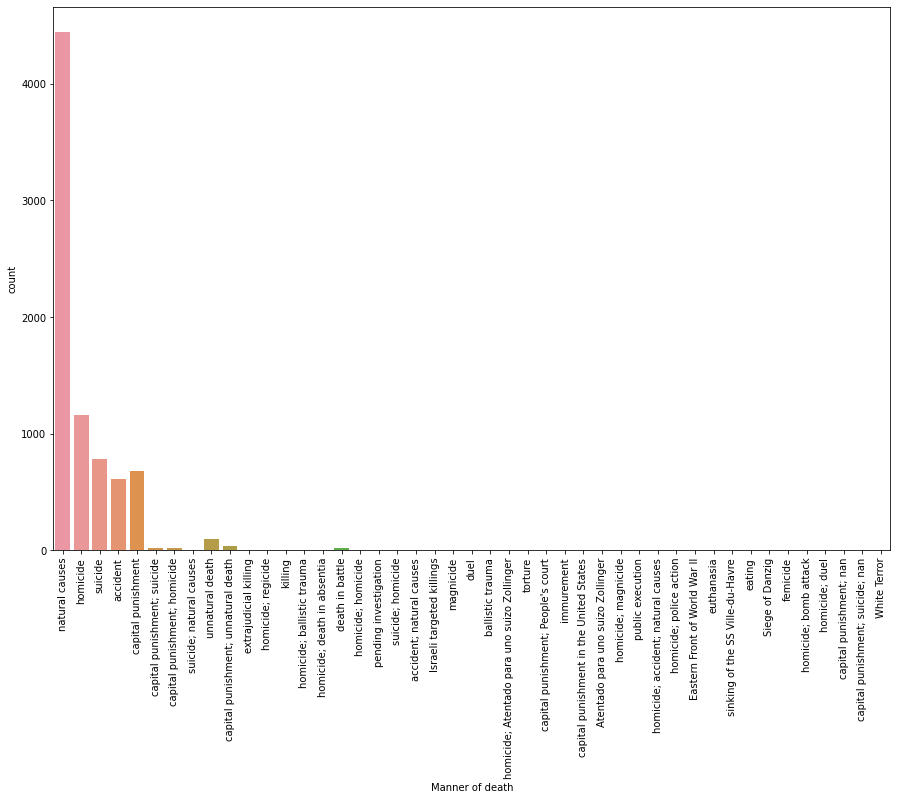

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(politicians['Manner of death'])
plt.xticks(rotation=90)
plt.show()

In [36]:
politicians['Manner of death'].unique().size

45

Text(0.5, 1.0, 'cause of death of politicians')

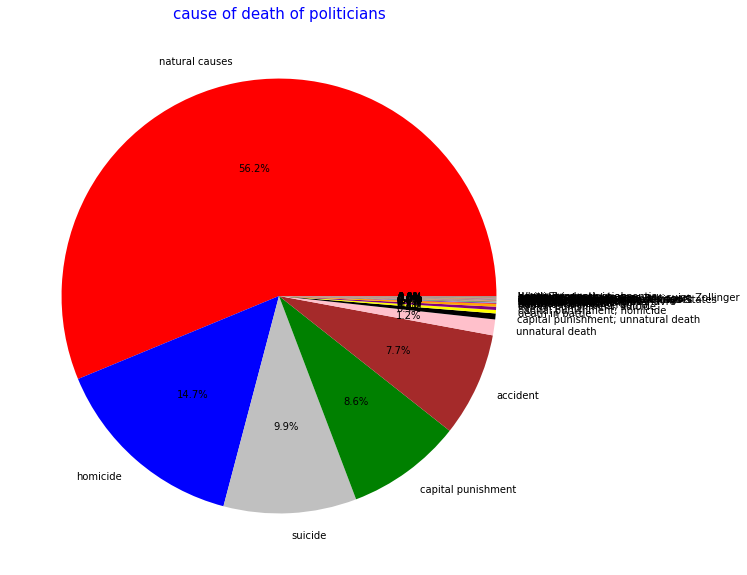

In [37]:
#pie plot 
label=politicians['Manner of death'].value_counts().index
colors=['red','blue','silver','green','brown','pink','black','yellow','purple','orange']
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes=politicians['Manner of death'].value_counts().values

#visual
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct='%1.1f%%')
plt.title('cause of death of politicians',color = 'blue',fontsize = 15)

<a id="7" ></a><br>
## Serial killer

In [38]:
serial_killer=Data[(Data['Occupation']=='Serial killer') ]
serial_killer

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
5351,Q61887,Fritz Haarmann,German serial killer,Male,Weimar Republic,Serial killer,1879,1925.0,capital punishment,46.0
5528,Q62256,Bruno Lüdke,German serial killer,Male,Germany,Serial killer,1908,1944.0,capital punishment,36.0
6076,Q63443,Eugen Weidmann,"German serial killer, last person to be public...",Male,Germany,Serial killer,1908,1939.0,capital punishment,31.0
7497,Q67370,Anna Maria Zwanziger,German serial killer,Female,null,Serial killer,1760,1811.0,capital punishment,51.0
8072,Q68963,Jürgen Bartsch,Serial killer,Male,Germany,Serial killer,1946,1976.0,accident,30.0
...,...,...,...,...,...,...,...,...,...,...
1027462,Q27786421,Robert Francis Burns,Irish Australian convicted murder,Male,null,Serial killer,1840,1883.0,capital punishment,43.0
1030402,Q27942465,"John ""Rocky"" Whelan",null,Male,null,Serial killer,1800,1855.0,capital punishment,55.0
1043799,Q28874209,Zhang Jun,null,Male,null,Serial killer,1966,2000.0,capital punishment,34.0
1055612,Q30323892,Louise Vermilya,null,Female,null,Serial killer,1868,1910.0,suicide,42.0


In [39]:
serial_killer[["Gender",'Age of death']].groupby(['Gender'],as_index=False).mean().sort_values(by='Age of death',ascending=True)

,Gender,Age of death
1,Male,42.394161
0,Female,48.043478


In [40]:
serial_killer[["Manner of death",'Age of death']].groupby(['Manner of death'],as_index=False).mean().sort_values(by='Age of death',ascending=True)

,Manner of death,Age of death
0,accident,30.000000
10,unnatural death,31.833333
5,homicide; ballistic trauma,33.000000
2,capital punishment; unnatural death,34.333333
3,gunshot,39.000000
1,capital punishment,39.469136
8,stabbing,42.000000
4,homicide,42.166667
9,suicide,42.812500
6,lethal injection,46.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


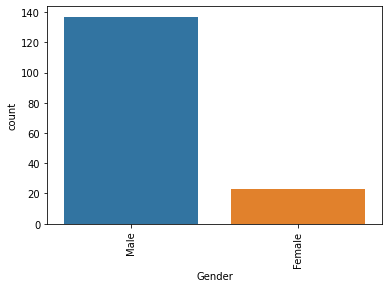

In [41]:
sns.countplot(serial_killer['Gender'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Number of serial killer by gender')

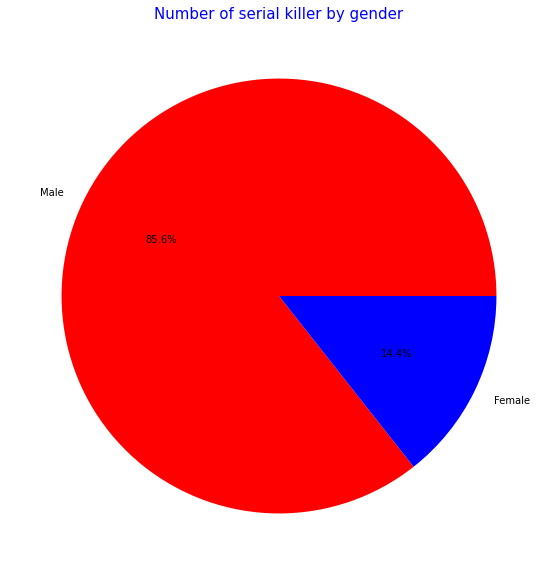

In [42]:
#pie plot 
label=serial_killer['Gender'].value_counts().index
colors=['red','blue']
explode = [0,0]
sizes=serial_killer['Gender'].value_counts().values

#visual
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct='%1.1f%%')
plt.title('Number of serial killer by gender',color = 'blue',fontsize = 15)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


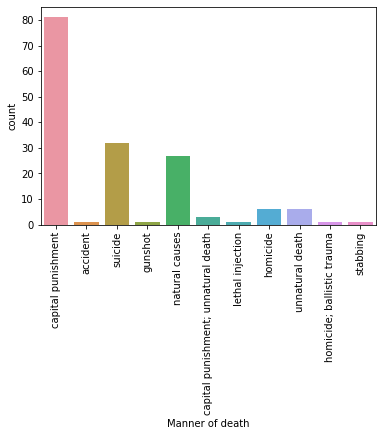

In [43]:
sns.countplot(serial_killer['Manner of death'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'cause of death of serial killer')

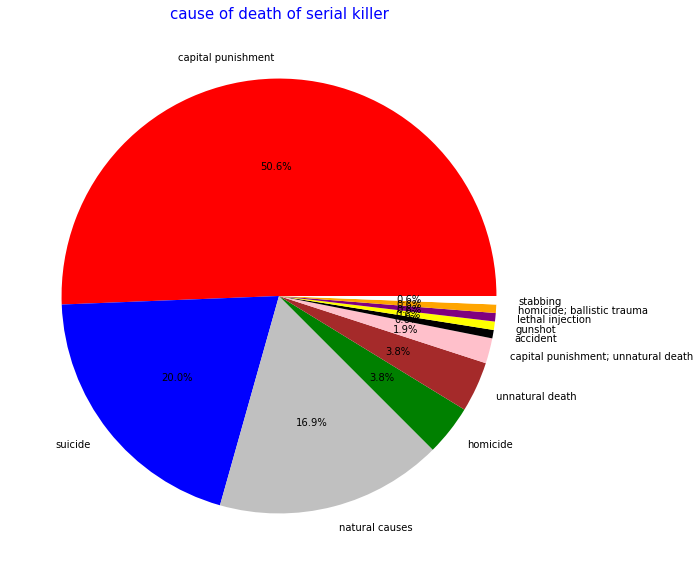

In [44]:
#pie plot 
label=serial_killer['Manner of death'].value_counts().index
colors=['red','blue','silver','green','brown','pink','black','yellow','purple','orange','white']
explode = [0,0,0,0,0,0,0,0,0,0,0]
sizes=serial_killer['Manner of death'].value_counts().values

#visual
plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct='%1.1f%%')
plt.title('cause of death of serial killer',color = 'blue',fontsize = 15)